In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as plt_fin
from tvDatafeed import Interval, TvDatafeed

torch.set_printoptions(sci_mode=False)
plt.style.use('dark_background')
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = .9
plt.rcParams['grid.color'] = 'lightgray'
plt.rcParams['grid.linewidth'] = .5
plt.rcParams['figure.figsize'] = (10, 5)

In [2]:
tview = TvDatafeed()
tview

INFO:tvDatafeed.main:setting token to hard-coded value


## Get All Stocks in NYSE

In [11]:
stocks_nyse = tview.find(exchange='NYSE', search_type='stocks', n_records=5000)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:19<00:00,  5.20it/s]


In [12]:
stocks_nyse.head()

,symbol,description,type,exchange,currency_code,logoid,provider_id,country,is_primary_listing,typespecs
0,PLTR,Palantir Technologies Inc.,stock,NYSE,USD,palantir,ice,US,True,['common']
1,AI,"C3.ai, Inc.",stock,NYSE,USD,c3-ai,ice,US,True,['common']
2,BABA,Alibaba Group Holding Limited,dr,NYSE,USD,alibaba,ice,US,nan,nan
3,SNOW,Snowflake Inc.,stock,NYSE,USD,snowflake,ice,US,True,['common']
4,NIO,NIO Inc.,dr,NYSE,USD,nio,ice,US,nan,nan


## Get All Avaliable Bonds

In [19]:
bonds = tview.find(search_type='bond', n_records=10000)

In [20]:
bonds.head()

,symbol,description,type,exchange,logoid,provider_id,country,typespecs,currency_code,prefix,is_primary_listing
0,US10Y,United States 10 Year Government Bonds Yield,bond,TVC,country/US,refinitiv,US,"['government', 'yield', 'benchmark']",nan,nan,nan
1,US02Y,United States 2 Year Government Bonds Yield,bond,TVC,country/US,refinitiv,US,"['government', 'yield', 'benchmark']",nan,nan,nan
2,US30Y,United States 30 Year Government Bonds Yield,bond,TVC,country/US,refinitiv,US,"['government', 'yield', 'benchmark']",nan,nan,nan
3,US05Y,United States 5 Year Government Bonds Yield,bond,TVC,country/US,refinitiv,US,"['government', 'yield', 'benchmark']",nan,nan,nan
4,US03MY,United States 3 Month Government Bonds Yield,bond,TVC,country/US,refinitiv,US,"['government', 'yield', 'benchmark']",nan,nan,nan


## Get Historical Data for Symbols

In [15]:
goog = tview.get_hist(
    symbol='GOOG',
    exchange='NASDAQ',
    interval=Interval.in_1_hour,
    n_bars=10000
)
aapl = tview.get_hist(
    symbol='AAPL',
    exchange='NASDAQ',
    interval=Interval.in_1_hour,
    n_bars=10000
)
goog.shape, aapl.shape

((10000, 6), (10000, 6))

<Axes: xlabel='datetime'>

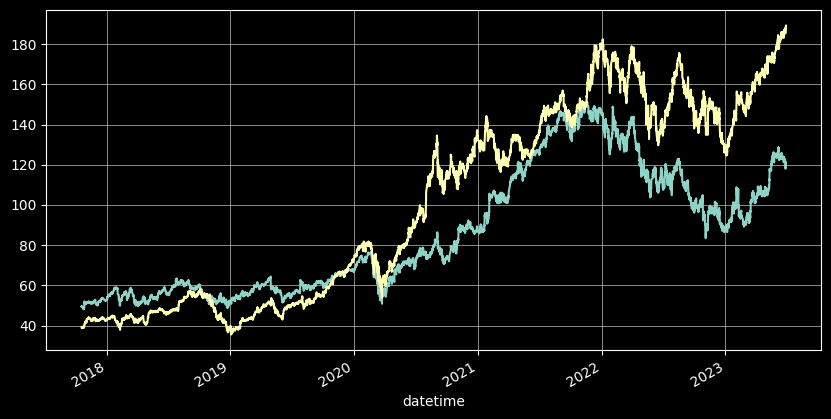

In [16]:
goog.close.plot()
aapl.close.plot()

In [5]:
gb_interest_rates = tview.get_hist(
    symbol='GBINTR',
    exchange='',
    interval=Interval.in_monthly,
    n_bars=420
)
ftse = tview.get_hist(
    symbol='UKX',
    exchange='FTSE',
    interval=Interval.in_monthly,
    n_bars=500
)

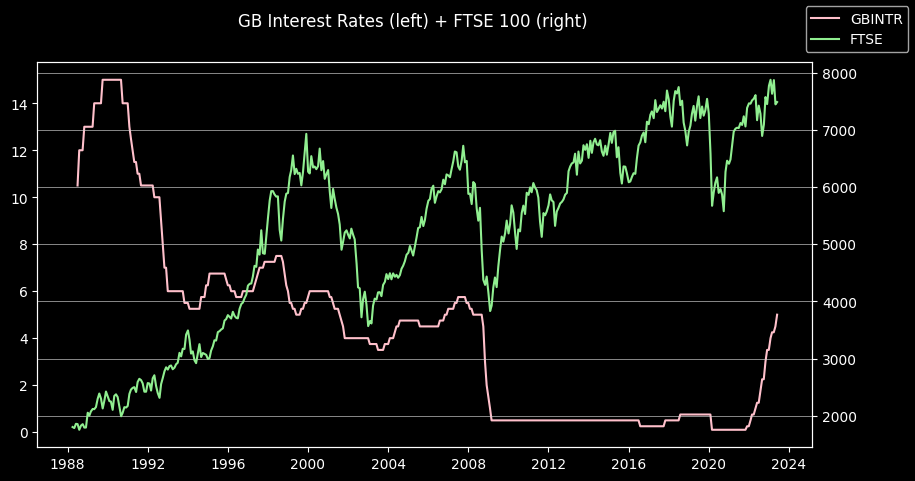

In [21]:
fig, axs = plt.subplots()
fig.suptitle('GB Interest Rates (left) + FTSE 100 (right)')
axs.plot(gb_interest_rates.close, label='GBINTR', color='pink')
axs.grid(False)

axs2 = axs.twinx()
axs2.plot(ftse.close, label='FTSE', color='lightgreen')

fig.legend()

In [19]:
# TODO: continue experimenting with the tview api here brother